In [68]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import kagglehub
import os
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
base_path =  kagglehub.dataset_download('blastchar/telco-customer-churn')

# Find the CSV file in the directory
csv_files = []
for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith('.csv'):
            csv_files.append(os.path.join(root, file))

if csv_files:
    # Use the first CSV file found
    data = pd.read_csv(csv_files[0], delimiter=',', nrows=None)
    print("Data loaded successfully:")
    print(data)
else:
    print(f"No CSV files found in {base_path}")
    print("Available files:", os.listdir(base_path))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Data loaded successfully:
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL       

The idea of this file is to learn how to work with unbalanced datasets, as well as how to handle missing and categorical data. We will be using the Telco Customer Churn dataset. When a customer cancels their subscription, they are considered churned. Their are many factors that can lead to churn, such as price, service, and marketing. We will be using this dataset to predict whether a customer will churn or not.


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Missing values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Duplicate rows:
0

Checking for NaNs:
customerID          0
gender              0
SeniorCitizen       0
Partner             0


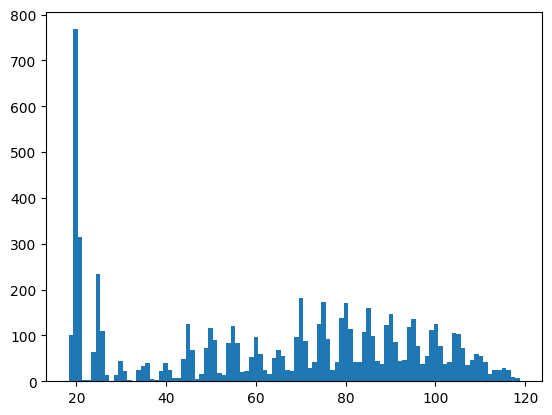


Distribution of Tenure Graph:


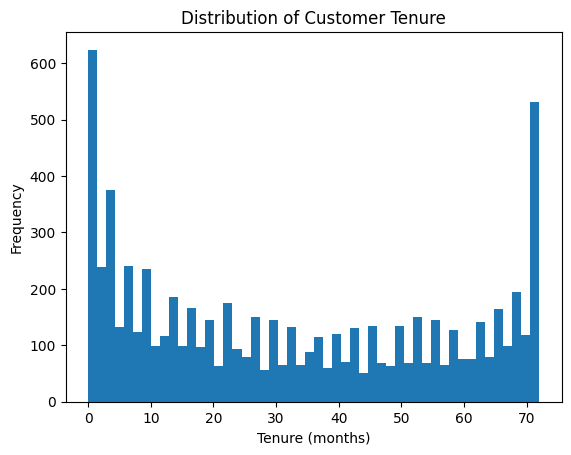

In [69]:
#List out all the columns in the dataset
print(data.columns)

#Group like columns together (just in notes)
'''
Customer Details:
    CustomerID: Unique identifier for each customer
    Gender: Gender of the customer
    SeniorCitizen: Whether the customer is a senior citizen or not
    Partner: Whether the customer has a partner or not
    Dependents: Whether the customer has dependents or not

Service Details:
    Tenure: Number of months the customer has been with the company

    PhoneService: Whether the customer has phone service or not
        MultipleLines: Whether the customer has multiple lines or not

    InternetService: Type of internet service the customer has
        OnlineSecurity: Whether the customer has online security or not
        OnlineBackup: Whether the customer has online backup or not
        DeviceProtection: Whether the customer has device protection or not
        TechSupport: Whether the customer has tech support or not
        StreamingTV: Whether the customer has streaming TV or not
        StreamingMovies: Whether the customer has streaming movies or not

Plan Details:
    Contract: Type of contract the customer has
    PaperlessBilling: Whether the customer has paperless billing or not
    PaymentMethod: Method of payment the customer has
    MonthlyCharges: Monthly charge for the customer
    TotalCharges: Total charge for the customer

Goal:
Churn: Whether the customer churned or not, meaning they cancelled their subscription
'''

#Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

#Check for duplicate rows
print("\nDuplicate rows:")
print(data.duplicated().sum())

print("\nChecking for NaNs:")
print(data.isna().sum())

#Check for unique values in a column
print("\nUnique values in Churn column:")
print(data['Churn'].unique())

#check data distribution and composition
def check_data_distribution(data):

    #Check distribution of churn, as well as other data
    print("\nDistribution of churn:")
    print(data['Churn'].value_counts())

    print("\nDistribution of gender:")
    print(data['gender'].value_counts())

    print("\nDistribution of SeniorCitizen:")
    print(data['SeniorCitizen'].value_counts())

    print("\nDistribution of Partner:")
    print(data['Partner'].value_counts())

    print("\nDistribution of Dependents:")
    print(data['Dependents'].value_counts())

    print("\nDistribution of PhoneService:")
    print(data['PhoneService'].value_counts())

    print("\nDistribution of MultipleLines:")
    print(data['MultipleLines'].value_counts())

    print("\nDistribution of InternetService:")
    print(data['InternetService'].value_counts())

    print("\nDistribution of OnlineSecurity:")
    print(data['OnlineSecurity'].value_counts())

    print("\nDistribution of OnlineBackup:")
    print(data['OnlineBackup'].value_counts())

    print("\nDistribution of DeviceProtection:")
    print(data['DeviceProtection'].value_counts())

    print("\nDistribution of TechSupport:")
    print(data['TechSupport'].value_counts())

    print("\nDistribution of StreamingTV:")
    print(data['StreamingTV'].value_counts())

    print("\nDistribution of StreamingMovies:")
    print(data['StreamingMovies'].value_counts())

    print("\nDistribution of Contract:")
    print(data['Contract'].value_counts())

    print("\nDistribution of PaperlessBilling:")
    print(data['PaperlessBilling'].value_counts())

    print("\nDistribution of PaymentMethod:")
    print(data['PaymentMethod'].value_counts())

    print("\nDistribution of MonthlyCharges Graph:")
    plt.hist(data['MonthlyCharges'], bins=100)
    plt.show()

    print("\nDistribution of Tenure Graph:")
    plt.hist(data['tenure'], bins=50)
    plt.xlabel('Tenure (months)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Customer Tenure')
    plt.show()

check_data_distribution(data)



### We have some debates to do now:

1. How do we handle the internet services / phone services?
2. Are other columns like gender, partner, dependents, etc. useful?
3. Does the number of columns around a topic like internet service, phone service, etc. have any bias that we might need to account for?




In [70]:
# Step 1: Initial binary conversion (baseline approach)
internet_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                    'TechSupport', 'StreamingTV', 'StreamingMovies']

phone_services = ['MultipleLines']

# Convert to binary but keep InternetService and PhoneService as-is
data_processed = data.copy()
for col in internet_services:
    data_processed[col] = data_processed[col].map({'Yes': 1, 'No': 0, 'No internet service': 0})

for col in phone_services:
    data_processed[col] = data_processed[col].map({'Yes': 1, 'No': 0, 'No phone service': 0})

# Keep track of which customers have internet for potential later use
data_processed['has_internet'] = (data_processed['InternetService'] != 'No').astype(int)



Distribution of churn:
Churn
0    5174
1    1869
Name: count, dtype: int64

Distribution of gender:
gender
0    3555
1    3488
Name: count, dtype: int64

Distribution of SeniorCitizen:
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Distribution of Partner:
Partner
0    3641
1    3402
Name: count, dtype: int64

Distribution of Dependents:
Dependents
0    4933
1    2110
Name: count, dtype: int64

Distribution of PhoneService:
PhoneService
1    6361
0     682
Name: count, dtype: int64

Distribution of MultipleLines:
MultipleLines
0    4072
1    2971
Name: count, dtype: int64

Distribution of InternetService:
InternetService
2    3096
1    2421
0    1526
Name: count, dtype: int64

Distribution of OnlineSecurity:
OnlineSecurity
0    5024
1    2019
Name: count, dtype: int64

Distribution of OnlineBackup:
OnlineBackup
0    4614
1    2429
Name: count, dtype: int64

Distribution of DeviceProtection:
DeviceProtection
0    4621
1    2422
Name: count, dtype: int64

Distribution of T

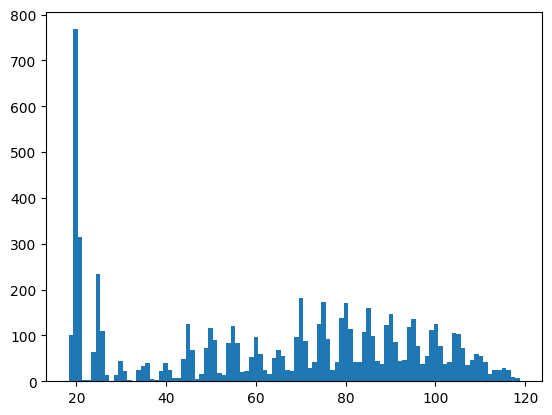


Distribution of Tenure Graph:


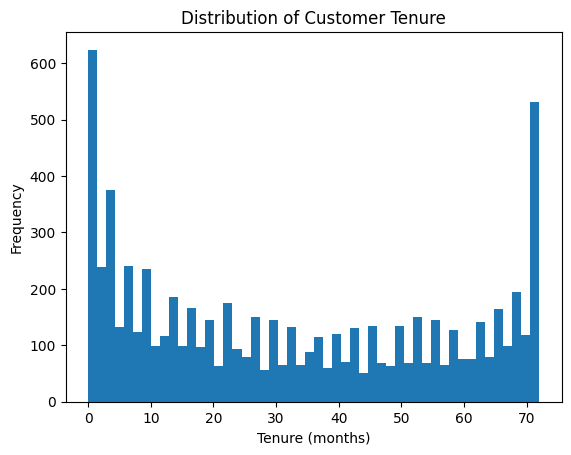

In [71]:
# Step 2: Feature engineering
features = data_processed.copy()

#replace 'partners' and 'dependents' with a simple 'household_type'
conditions = [
    (features['Partner'] == 'No') & (features['Dependents'] == 'No'),
    (features['Partner'] == 'No') & (features['Dependents'] == 'Yes'),
    (features['Partner'] == 'Yes') & (features['Dependents'] == 'No'),
    (features['Partner'] == 'Yes') & (features['Dependents'] == 'Yes')
]

vals = ['Single', 'Single Parent', 'Couple', 'Family']
features['household_type'] = np.select(conditions, vals, default='Unknown')

#Group Services by Type
# Define service groups
security_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection']
entertainment_services = ['StreamingTV', 'StreamingMovies']
support_services = ['TechSupport']

# Create basic counts for each group
features['has_support'] = features['TechSupport'].astype(int)  # Since it's just one service

#Create percentage scores for groups with multiple services
features['security_score'] = features[security_services].apply(lambda x: sum(x == 1), axis=1) / len(security_services)
features['entertainment_score'] = features[entertainment_services].apply(lambda x: sum(x == 1), axis=1) / len(entertainment_services)

#Split Payment type into sophistication levels (0: basic, 1: electronic, 2: automatic)
features['payment_sophistication'] = features['PaymentMethod'].map({
    'Mailed check': 0,
    'Electronic check': 1,
    'Bank transfer (automatic)': 2,
    'Credit card (automatic)': 2
})

# Convert tenure to stages based on range, ensuring no NaNs are created
features['tenure_stage'] = pd.cut(features['tenure'].fillna(0),
    bins=[0, 3, 12, 30, 60, float('inf')],
    labels=['New', 'Early', 'Established', 'Long-term', 'Veteran'],
    right=False)  # Use right=False to include the left edge and avoid NaNs

#Create a premimium customer flag
    #marked true if they have some sort of yearly plan and tenure is over the median
    #should show long term commitment and longevity
conditions = [
    ((features['tenure_stage'] != 'New') & (features['tenure_stage'] != 'Early')),
    (features['Contract'] != 'Month-to-month')
]

features['is_premium'] = (conditions[0] & conditions[1]).astype(int)


#prepair for conversion to numerical format
data_converted = features.copy()

'''
Customer Details:
    CustomerID: Numerical
    Gender: 0 - male 1 - female
    SeniorCitizen: Done (0 for no, 1 for yes)
    Partner: 0 for no, 1 for yes
    Dependents: 0 for no, 1 for yes

Service Details:
    Tenure: Numerical

    PhoneService: 0 for no, 1 for yes
        MultipleLines: Done (0 for no or no phoneservice, 1 for yes)

    InternetService: Type of internet service the customer has
        OnlineSecurity: Done (0 for no or no InternetService, 1 for yes)
        OnlineBackup: Done (0 for no or no InternetService, 1 for yes) 
        DeviceProtection: Done (0 for no or no InternetService, 1 for yes)
        TechSupport: Done (0 for no or no InternetService, 1 for yes)
        StreamingTV: Done (0 for no or no InternetService, 1 for yes)
        StreamingMovies: Done (0 for no or no InternetService, 1 for yes)

Plan Details:
    Contract: 0 for month-to-month, 1 for yearly, 2 for bi-yearly
    PaperlessBilling: 0 for no, 1 for yes
    PaymentMethod: taken care of in payment_sophistication, but convert to  
        'Mailed check': 0,
        'Electronic check': 1,
        'Bank transfer (automatic)': 2,
        'Credit card (automatic)': 3
    MonthlyCharges: Numerical
    TotalCharges: Numerical

Goal:
Churn: 0 for no, 1 for yes
'''

# Convert categorical variables to numerical
data_converted['gender'] = data_converted['gender'].map({'Male': 0, 'Female': 1})
data_converted['Partner'] = data_converted['Partner'].map({'No': 0, 'Yes': 1})
data_converted['Dependents'] = data_converted['Dependents'].map({'No': 0, 'Yes': 1})
data_converted['PhoneService'] = data_converted['PhoneService'].map({'No': 0, 'Yes': 1})

# Convert InternetService to numerical categories
data_converted['InternetService'] = data_converted['InternetService'].map({
    'No': 0,
    'DSL': 1, 
    'Fiber optic': 2
})

# Convert Contract types
data_converted['Contract'] = data_converted['Contract'].map({
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
})

# Convert PaperlessBilling
data_converted['PaperlessBilling'] = data_converted['PaperlessBilling'].map({'No': 0, 'Yes': 1})

# Convert PaymentMethod
data_converted['PaymentMethod'] = data_converted['PaymentMethod'].map({
    'Mailed check': 0,
    'Electronic check': 1,
    'Bank transfer (automatic)': 2,
    'Credit card (automatic)': 3
})

# Convert TotalCharges from object to numeric, handling any spaces and filling NaNs with 0
data_converted['TotalCharges'] = pd.to_numeric(data_converted['TotalCharges'], errors='coerce').fillna(0)

#Convert Churn
data_converted['Churn'] = data_converted['Churn'].map({'No': 0, 'Yes': 1})

#Convert household type:
data_converted['household_type'] = data_converted['household_type'].map({
    'Single': 0,
    'Couple': 1,
    'Single Parent': 2,
    'Family' : 3 
})

#check distrubtion again to see whats done
check_data_distribution(data_converted)

#convert tenure stage
data_converted['tenure_stage'] = data_converted['tenure_stage'].map({
    'New': 0,
    'Early': 1, 
    'Established': 2,
    'Long-term': 3,
    'Veteran': 4
})


Lets now check if our new features are meaningful

Count of premium customers: 0.42694874343319605


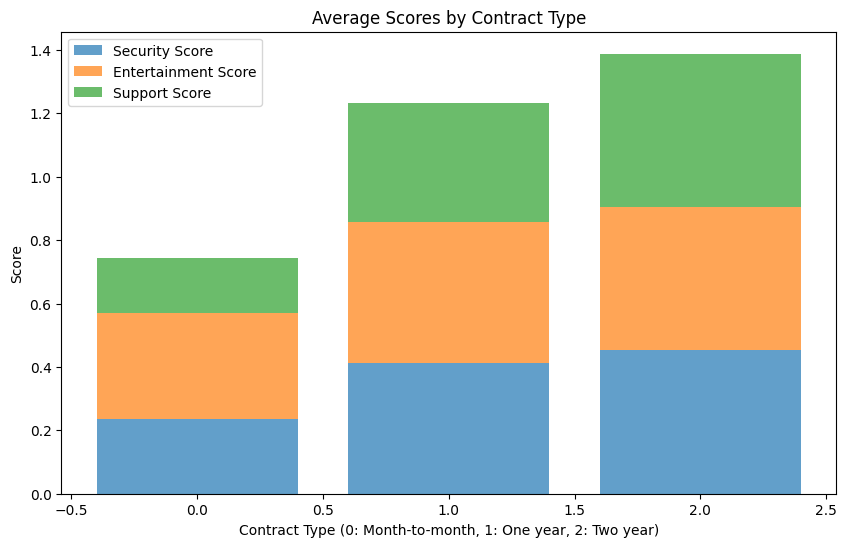

Unique values in tenure_stage: [0, 3, 1, 2, 4]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]


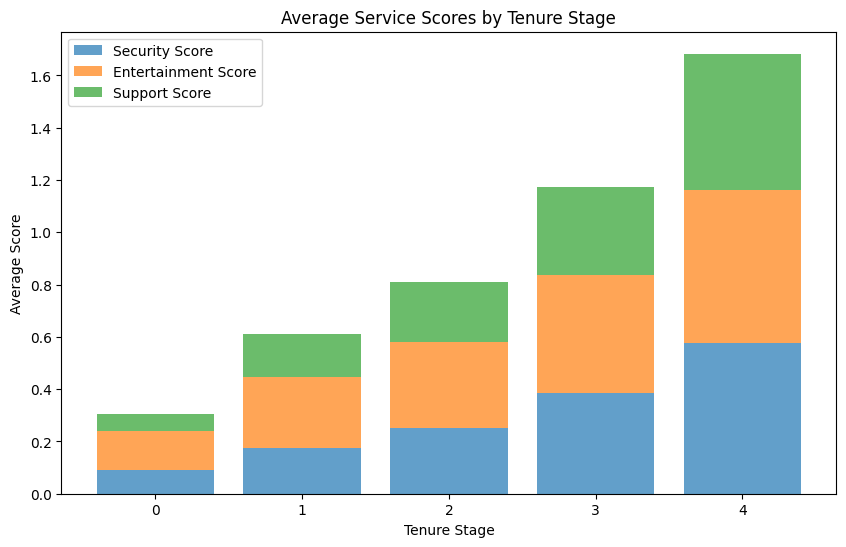

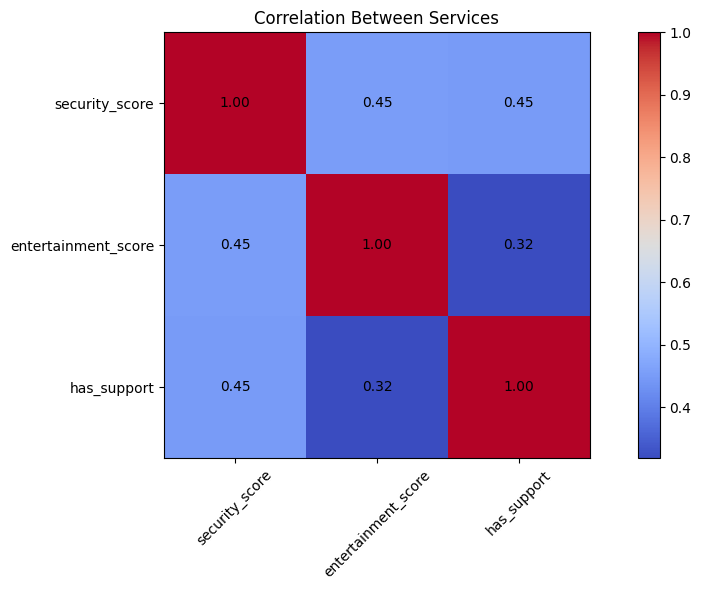

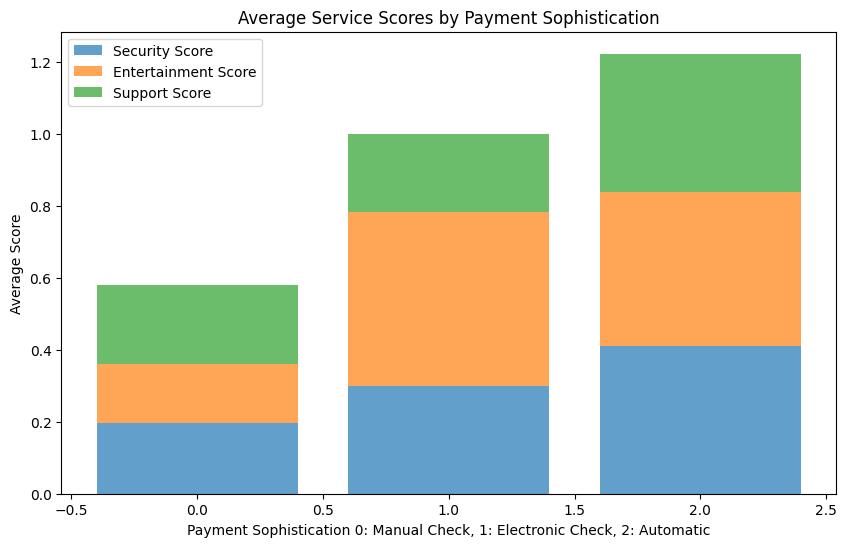

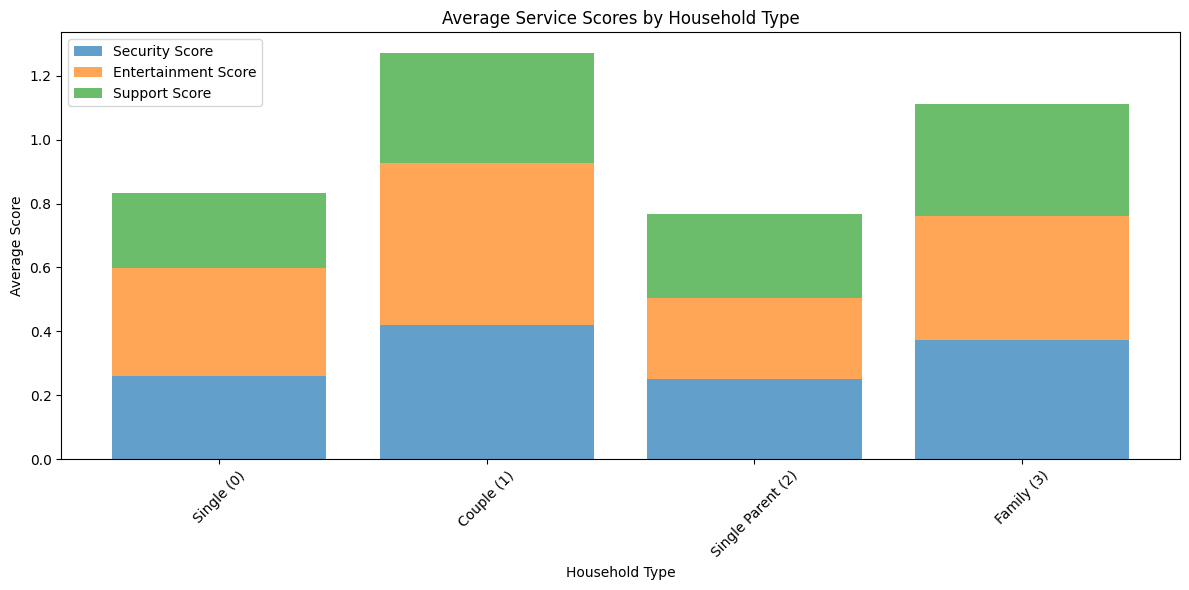

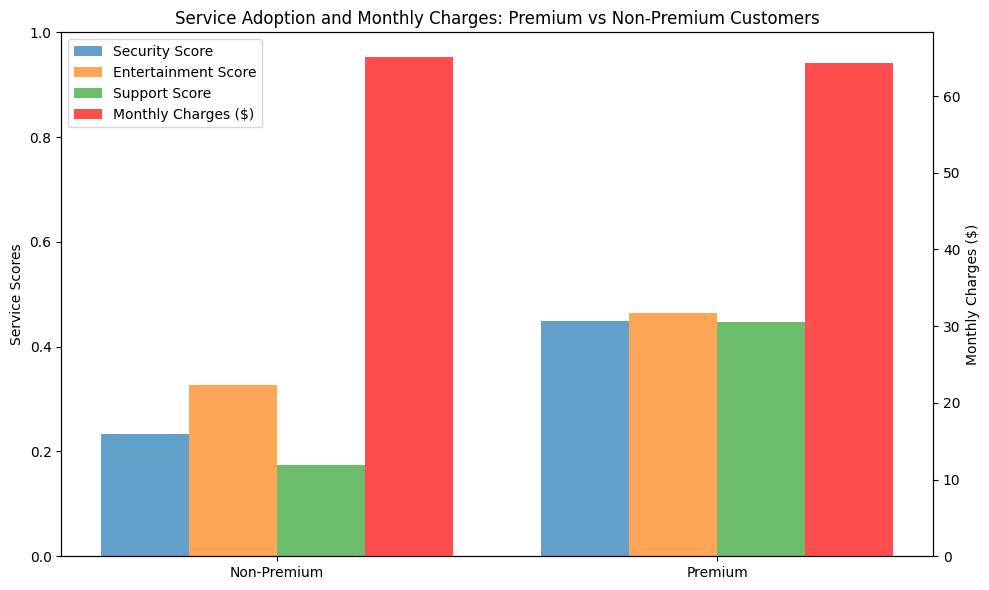


Average Monthly Charges:
is_premium
0    65.056380
1    64.366162
Name: MonthlyCharges, dtype: float64


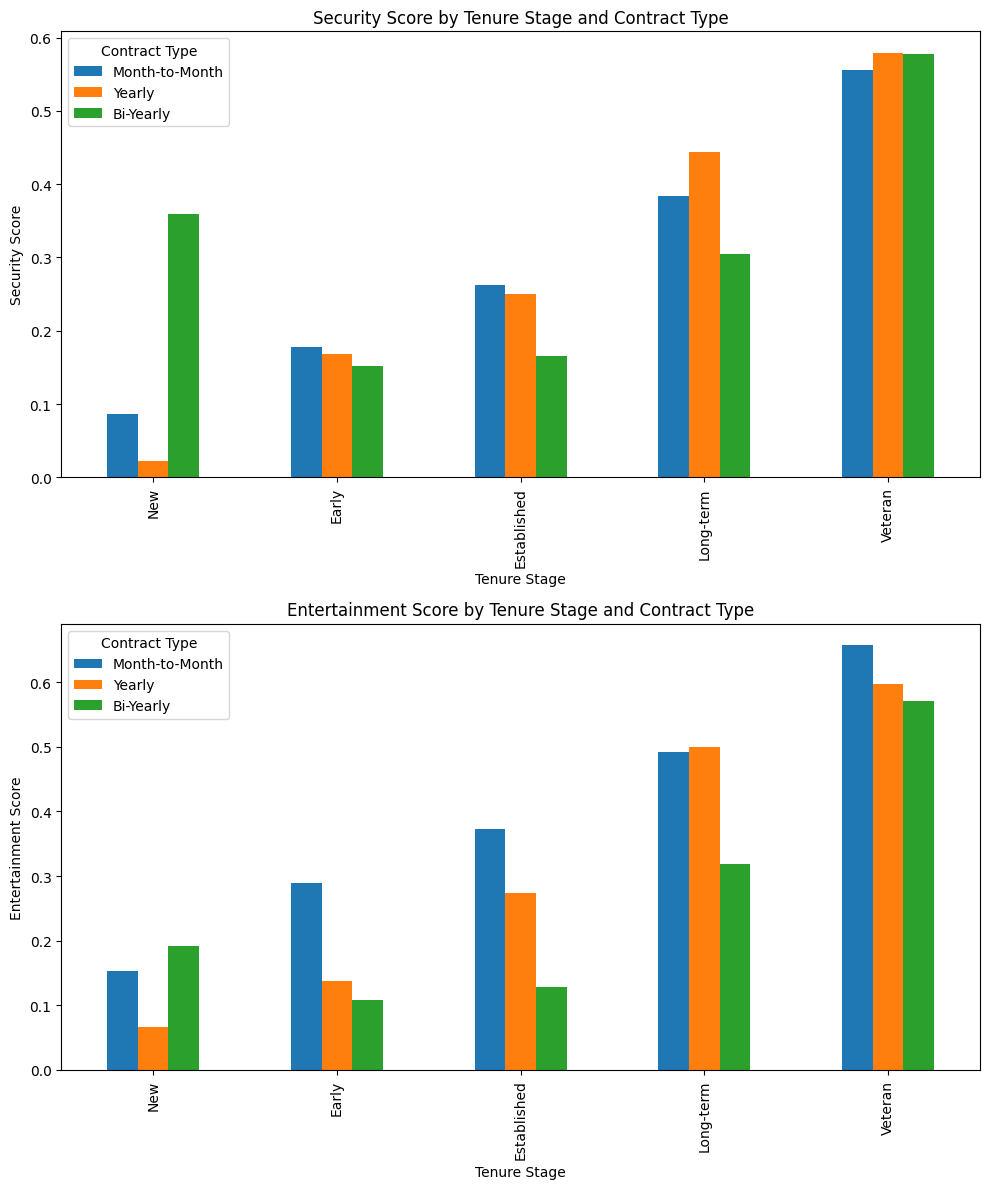


Service Scores by Tenure Stage and Contract Type:
             entertainment_score                     security_score            \
Contract                       0         1         2              0         1   
tenure_stage                                                                    
0                       0.152878  0.066667  0.192308       0.086731  0.022222   
1                       0.288641  0.137931  0.108696       0.177219  0.168582   
2                       0.372126  0.273700  0.127907       0.262452  0.250765   
3                       0.491834  0.499293  0.318648       0.384422  0.444602   
4                       0.657480  0.597923  0.571148       0.556430  0.579624   

                        
Contract             2  
tenure_stage            
0             0.358974  
1             0.152174  
2             0.165375  
3             0.304645  
4             0.577363  


<Figure size 1000x600 with 0 Axes>

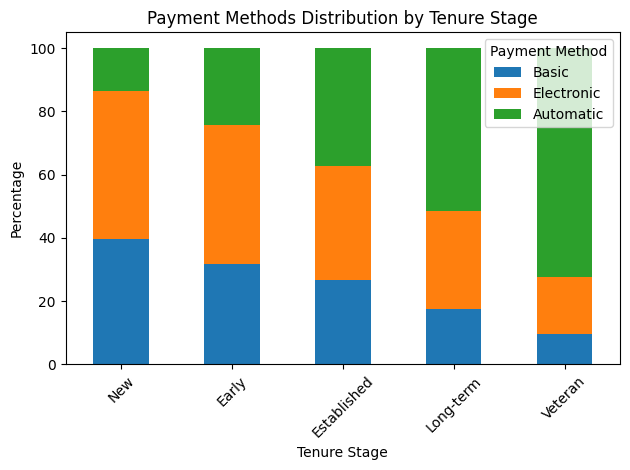


Payment Methods by Tenure Stage:
payment_sophistication    0    1     2
tenure_stage                          
0                       341  405   116
1                       384  529   294
2                       399  544   557
3                       348  619  1024
4                       140  268  1075

Percentage Distribution:
payment_sophistication      0      1      2
tenure_stage                               
0                       39.56  46.98  13.46
1                       31.81  43.83  24.36
2                       26.60  36.27  37.13
3                       17.48  31.09  51.43
4                        9.44  18.07  72.49


In [72]:
def plot_premium_customer_stats(data_converted):
    print("Count of premium customers:", features['is_premium'].sum() / features.shape[0])

def plot_scores_by_contract(data_converted):
    # Calculate mean scores for each contract type
    mean_scores = data_converted.groupby('Contract')[['security_score', 'entertainment_score', 'has_support']].mean()

    # Create bar plot
    plt.figure(figsize=(10,6))
    plt.bar(mean_scores.index, mean_scores['security_score'], label='Security Score', alpha=0.7)
    plt.bar(mean_scores.index, mean_scores['entertainment_score'], bottom=mean_scores['security_score'], 
            label='Entertainment Score', alpha=0.7)
    plt.bar(mean_scores.index, mean_scores['has_support'], 
            bottom=mean_scores['security_score'] + mean_scores['entertainment_score'],
            label='Support Score', alpha=0.7)

    plt.title('Average Scores by Contract Type')
    plt.xlabel('Contract Type (0: Month-to-month, 1: One year, 2: Two year)')
    plt.ylabel('Score')
    plt.legend()
    plt.show()

def plot_scores_by_tenure(data_converted):
    plt.figure(figsize=(10,6))
    print("Unique values in tenure_stage:", data_converted['tenure_stage'].unique())
    mean_scores = data_converted.groupby('tenure_stage', observed=False)[['security_score', 'entertainment_score', 'has_support']].mean()

    plt.bar(mean_scores.index.sort_values(), mean_scores['security_score'], label='Security Score', alpha=0.7)
    plt.bar(mean_scores.index.sort_values(), mean_scores['entertainment_score'], 
            bottom=mean_scores['security_score'], label='Entertainment Score', alpha=0.7)
    plt.bar(mean_scores.index.sort_values(), mean_scores['has_support'],
            bottom=mean_scores['security_score'] + mean_scores['entertainment_score'],
            label='Support Score', alpha=0.7)

    plt.title('Average Service Scores by Tenure Stage')
    plt.xlabel('Tenure Stage')
    plt.ylabel('Average Score')
    plt.legend()
    plt.show()

def plot_service_correlations(data_converted):
    service_cols = ['security_score', 'entertainment_score', 'has_support']
    correlation_matrix = data_converted[service_cols].corr()

    plt.figure(figsize=(10,6))
    plt.imshow(correlation_matrix, cmap='coolwarm')
    plt.colorbar()

    for i in range(len(correlation_matrix)):
        for j in range(len(correlation_matrix)):
            plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', 
                    ha='center', va='center')

    plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
    plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
    plt.title('Correlation Between Services')
    plt.tight_layout()
    plt.show()

def plot_scores_by_payment(data_converted):
    plt.figure(figsize=(10,6))
    mean_scores = data_converted.groupby('payment_sophistication')[['security_score', 'entertainment_score', 'has_support']].mean()

    plt.bar(mean_scores.index.sort_values(), mean_scores['security_score'], label='Security Score', alpha=0.7)
    plt.bar(mean_scores.index.sort_values(), mean_scores['entertainment_score'], 
            bottom=mean_scores['security_score'], label='Entertainment Score', alpha=0.7)
    plt.bar(mean_scores.index.sort_values(), mean_scores['has_support'],
            bottom=mean_scores['security_score'] + mean_scores['entertainment_score'],
            label='Support Score', alpha=0.7)

    plt.title('Average Service Scores by Payment Sophistication')
    plt.xlabel('Payment Sophistication 0: Manual Check, 1: Electronic Check, 2: Automatic')
    plt.ylabel('Average Score')
    plt.legend()
    plt.show()

def plot_scores_by_household(data_converted):
    plt.figure(figsize=(12,6))
    household_scores = data_converted.groupby('household_type')[['security_score', 'entertainment_score', 'has_support']].mean()

    household_type_labels = ['Single (0)', 'Couple (1)', 'Single Parent (2)', 'Family (3)']
    plt.bar(household_type_labels, household_scores['security_score'], label='Security Score', alpha=0.7)
    plt.bar(household_type_labels, household_scores['entertainment_score'], 
            bottom=household_scores['security_score'], label='Entertainment Score', alpha=0.7)
    plt.bar(household_type_labels, household_scores['has_support'],
            bottom=household_scores['security_score'] + household_scores['entertainment_score'],
            label='Support Score', alpha=0.7)

    plt.title('Average Service Scores by Household Type')
    plt.xlabel('Household Type')
    plt.ylabel('Average Score')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_premium_comparison(data_converted):
    premium_comparison = data_converted.groupby('is_premium')[['security_score', 'entertainment_score', 'has_support', 'MonthlyCharges']].mean()

    fig, ax1 = plt.subplots(figsize=(10,6))
    x = np.arange(2)
    width = 0.2

    ax1.bar(x - width*1.5, premium_comparison['security_score'], width, label='Security Score', alpha=0.7)
    ax1.bar(x - width/2, premium_comparison['entertainment_score'], width, label='Entertainment Score', alpha=0.7)
    ax1.bar(x + width/2, premium_comparison['has_support'], width, label='Support Score', alpha=0.7)

    ax2 = ax1.twinx()
    ax2.bar(x + width*1.5, premium_comparison['MonthlyCharges'], width, label='Monthly Charges ($)', 
            color='red', alpha=0.7)

    ax1.set_ylabel('Service Scores')
    ax1.set_ylim(0, 1)
    ax2.set_ylabel('Monthly Charges ($)')
    plt.xticks(x, ['Non-Premium', 'Premium'])

    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    plt.title('Service Adoption and Monthly Charges: Premium vs Non-Premium Customers')
    plt.tight_layout()
    plt.show()

    print("\nAverage Monthly Charges:")
    print(premium_comparison['MonthlyCharges'])

def plot_service_tenure_contract(data_converted):
    pivot_table = pd.pivot_table(data_converted, 
                               values=['security_score', 'entertainment_score'],
                               index='tenure_stage',
                               columns='Contract',
                               aggfunc='mean',
                               observed=True)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

    pivot_table['security_score'].plot(kind='bar', ax=ax1)
    ax1.set_title('Security Score by Tenure Stage and Contract Type')
    ax1.set_xlabel('Tenure Stage')
    ax1.set_ylabel('Security Score')
    ax1.legend(title='Contract Type', labels=['Month-to-Month', 'Yearly', 'Bi-Yearly'])
    ax1.set_xticklabels(['New', 'Early', 'Established', 'Long-term', 'Veteran'])

    pivot_table['entertainment_score'].plot(kind='bar', ax=ax2)
    ax2.set_title('Entertainment Score by Tenure Stage and Contract Type')
    ax2.set_xlabel('Tenure Stage')
    ax2.set_ylabel('Entertainment Score')
    ax2.legend(title='Contract Type', labels=['Month-to-Month', 'Yearly', 'Bi-Yearly'])
    ax2.set_xticklabels(['New', 'Early', 'Established', 'Long-term', 'Veteran'])

    plt.tight_layout()
    plt.show()

    print("\nService Scores by Tenure Stage and Contract Type:")
    print(pivot_table)

def plot_payment_tenure(data_converted):
    payment_tenure = pd.crosstab(data_converted['tenure_stage'], 
                               data_converted['payment_sophistication'])

    plt.figure(figsize=(10, 6))
    payment_tenure_pct = payment_tenure.div(payment_tenure.sum(axis=1), axis=0) * 100
    ax = payment_tenure_pct.plot(kind='bar', stacked=True)

    plt.title('Payment Methods Distribution by Tenure Stage')
    plt.xlabel('Tenure Stage')
    plt.ylabel('Percentage')
    plt.legend(title='Payment Method', labels=['Basic', 'Electronic', 'Automatic'])
    ax.set_xticklabels(['New', 'Early', 'Established', 'Long-term', 'Veteran'], rotation=45)
    plt.tight_layout()
    plt.show()

    print("\nPayment Methods by Tenure Stage:")
    print(payment_tenure)
    print("\nPercentage Distribution:")
    print(payment_tenure_pct.round(2))

# Run all the plots
plot_premium_customer_stats(data_converted)
plot_scores_by_contract(data_converted)
plot_scores_by_tenure(data_converted)
plot_service_correlations(data_converted)
plot_scores_by_payment(data_converted)
plot_scores_by_household(data_converted)
plot_premium_comparison(data_converted)
plot_service_tenure_contract(data_converted)
plot_payment_tenure(data_converted)


Average Monthly Charges by Contract Type:
Contract
0    66.398490
1    65.048608
2    60.770413
Name: MonthlyCharges, dtype: float64


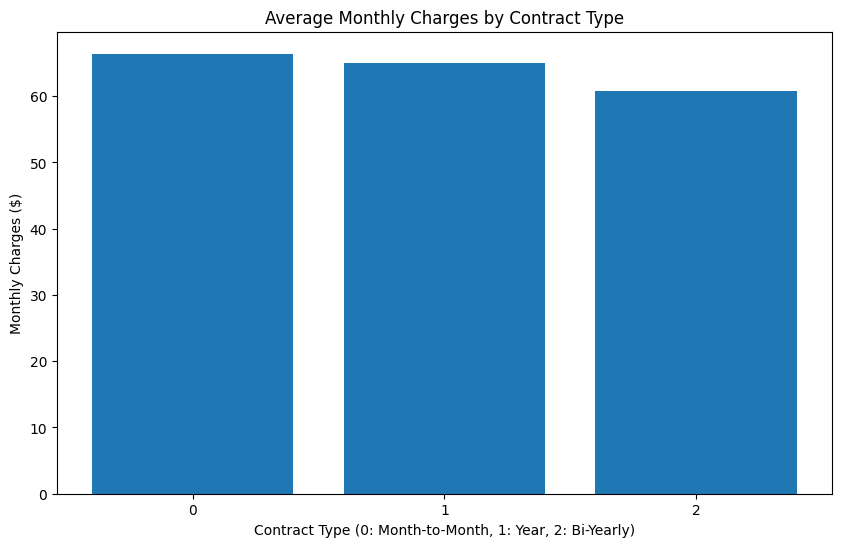


Contract Distribution for Premium vs Non-Premium customers:
Contract       0     1     2
is_premium                  
0           3875   102    59
1              0  1371  1636


In [73]:
#To understand the reason 'premium users' are paying less but have more, lets look at monthly rates for contract types
# Look at average monthly charges by contract type
contract_charges = data_converted.groupby('Contract')['MonthlyCharges'].mean()
print("\nAverage Monthly Charges by Contract Type:")
print(contract_charges)

# Create a visualization
plt.figure(figsize=(10,6))
plt.bar(['0', '1', '2'], contract_charges)
plt.title('Average Monthly Charges by Contract Type')
plt.xlabel('Contract Type (0: Month-to-Month, 1: Year, 2: Bi-Yearly)')
plt.ylabel('Monthly Charges ($)')
plt.show()

# Also look at the distribution of contract types among premium customers
premium_contracts = pd.crosstab(data_converted['is_premium'], data_converted['Contract'])
print("\nContract Distribution for Premium vs Non-Premium customers:")
print(premium_contracts)

Since the yearly and bi-yearly subscribers pay much less per month even though their service scores are higher, it clearly shows they get a better rate on services.


Churn Rate by Premium Status:
Churn          0     1
is_premium            
0           2373  1663
1           2801   206
Non-Premium: 58.8% stay, 41.2% churn
Premium: 93.1% stay, 6.9% churn

Churn Rate by Contract Type:
Churn        0     1
Contract            
0         2220  1655
1         1307   166
2         1647    48
Month-to-Month: 57.3% stay, 42.7% churn
One Year: 88.7% stay, 11.3% churn
Two Year: 97.2% stay, 2.8% churn

Churn Rate by Tenure Stage:
Churn            0    1
tenure_stage           
0              359  503
1              711  496
2             1090  410
3             1630  361
4             1384   99
New: 41.6% stay, 58.4% churn
Recent: 58.9% stay, 41.1% churn
Established: 72.7% stay, 27.3% churn
Long-Term: 81.9% stay, 18.1% churn
Veteran: 93.3% stay, 6.7% churn

Churn Rate by Payment_Sophistication:
Churn                      0     1
payment_sophistication            
0                       1304   308
1                       1294  1071
2                       2

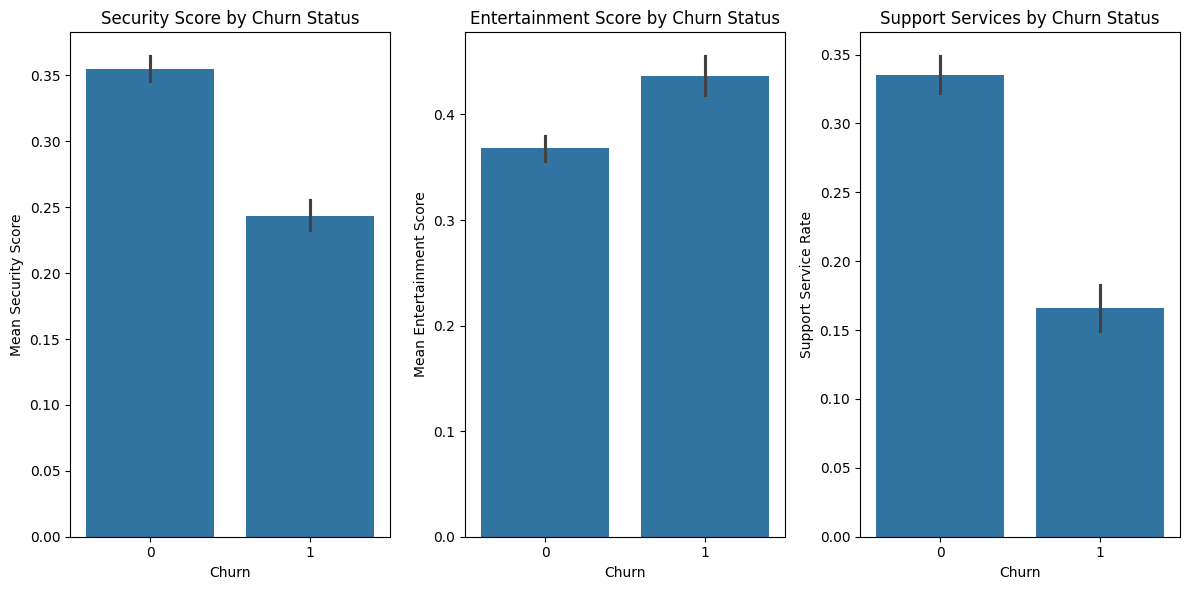

In [74]:
# Analyze relationships between our features and churn rate

# Premium status vs Churn
premium_churn = pd.crosstab(data_converted['is_premium'], data_converted['Churn'])
premium_churn_pct = premium_churn.div(premium_churn.sum(axis=1), axis=0) * 100
print("\nChurn Rate by Premium Status:")
print(premium_churn)
print(f"Non-Premium: {premium_churn_pct.iloc[0,0]:.1f}% stay, {premium_churn_pct.iloc[0,1]:.1f}% churn")
print(f"Premium: {premium_churn_pct.iloc[1,0]:.1f}% stay, {premium_churn_pct.iloc[1,1]:.1f}% churn")

# Contract type vs Churn
contract_churn = pd.crosstab(data_converted['Contract'], data_converted['Churn'])
contract_churn_pct = contract_churn.div(contract_churn.sum(axis=1), axis=0) * 100
print("\nChurn Rate by Contract Type:")
print(contract_churn)
print(f"Month-to-Month: {contract_churn_pct.iloc[0,0]:.1f}% stay, {contract_churn_pct.iloc[0,1]:.1f}% churn")
print(f"One Year: {contract_churn_pct.iloc[1,0]:.1f}% stay, {contract_churn_pct.iloc[1,1]:.1f}% churn") 
print(f"Two Year: {contract_churn_pct.iloc[2,0]:.1f}% stay, {contract_churn_pct.iloc[2,1]:.1f}% churn")

# Tenure stage vs Churn
tenure_churn = pd.crosstab(data_converted['tenure_stage'], data_converted['Churn'])
tenure_churn_pct = tenure_churn.div(tenure_churn.sum(axis=1), axis=0) * 100
print("\nChurn Rate by Tenure Stage:")
print(tenure_churn)
print(f"New: {tenure_churn_pct.iloc[0,0]:.1f}% stay, {tenure_churn_pct.iloc[0,1]:.1f}% churn")
print(f"Recent: {tenure_churn_pct.iloc[1,0]:.1f}% stay, {tenure_churn_pct.iloc[1,1]:.1f}% churn")
print(f"Established: {tenure_churn_pct.iloc[2,0]:.1f}% stay, {tenure_churn_pct.iloc[2,1]:.1f}% churn")
print(f"Long-Term: {tenure_churn_pct.iloc[3,0]:.1f}% stay, {tenure_churn_pct.iloc[3,1]:.1f}% churn")
print(f"Veteran: {tenure_churn_pct.iloc[4,0]:.1f}% stay, {tenure_churn_pct.iloc[4,1]:.1f}% churn")

# Payment Method vs Churn
payment_churn = pd.crosstab(data_converted['payment_sophistication'], data_converted['Churn'])
payment_churn_pct = payment_churn.div(payment_churn.sum(axis=1), axis=0) * 100
print("\nChurn Rate by Payment_Sophistication:")
print(payment_churn)
for i in range(len(payment_churn_pct)):
    method = payment_churn_pct.index[i]
    print(f"{method}: {payment_churn_pct.iloc[i,0]:.1f}% stay, {payment_churn_pct.iloc[i,1]:.1f}% churn")

# Household Type vs Churn
household_churn = pd.crosstab(data_converted['household_type'], data_converted['Churn'])
household_churn_pct = household_churn.div(household_churn.sum(axis=1), axis=0) * 100
print("\nChurn Rate by Household Type:")
print(household_churn)
for i in range(len(household_churn_pct)):
    htype = household_churn_pct.index[i]
    print(f"{htype}: {household_churn_pct.iloc[i,0]:.1f}% stay, {household_churn_pct.iloc[i,1]:.1f}% churn")

# Service Scores vs Churn
import seaborn as sns

plt.figure(figsize=(12, 6))

# Security Services
plt.subplot(131)
sns.barplot(x='Churn', y='security_score', data=data_converted)
plt.title('Security Score by Churn Status')
plt.ylabel('Mean Security Score')

# Entertainment Services  
plt.subplot(132)
sns.barplot(x='Churn', y='entertainment_score', data=data_converted)
plt.title('Entertainment Score by Churn Status')
plt.ylabel('Mean Entertainment Score')

# Support Services
plt.subplot(133)
sns.barplot(x='Churn', y='has_support', data=data_converted)
plt.title('Support Services by Churn Status')
plt.ylabel('Support Service Rate')

plt.tight_layout()
plt.show()



Looks like all of these features are proved to have a correlation to churn! The only thing that needs to be change is Payment_Method, as it looks like electronic check is the only one that correlates to Churning.

In [75]:
# Create binary feature for electronic check payment method
data_converted['is_electronic_check'] = (data_converted['PaymentMethod'] == 1).astype(int)

# Verify the new feature
print("\nElectronic Check Distribution:")
print(data_converted['is_electronic_check'].value_counts())
print("\nPercentage:")
print(data_converted['is_electronic_check'].value_counts(normalize=True).mul(100).round(1))



Electronic Check Distribution:
is_electronic_check
0    4678
1    2365
Name: count, dtype: int64

Percentage:
is_electronic_check
0    66.4
1    33.6
Name: proportion, dtype: float64


Lastly, lets explore the features that we didn't engineer, and see if they have any correlation to churning


Churn Rate by gender:
Churn      0    1
gender           
0       2625  930
1       2549  939
0: 73.8% stay, 26.2% churn
1: 73.1% stay, 26.9% churn

Churn Rate by SeniorCitizen:
Churn             0     1
SeniorCitizen            
0              4508  1393
1               666   476
0: 76.4% stay, 23.6% churn
1: 58.3% stay, 41.7% churn

Churn Rate by PaperlessBilling:
Churn                0     1
PaperlessBilling            
0                 2403   469
1                 2771  1400
0: 83.7% stay, 16.3% churn
1: 66.4% stay, 33.6% churn


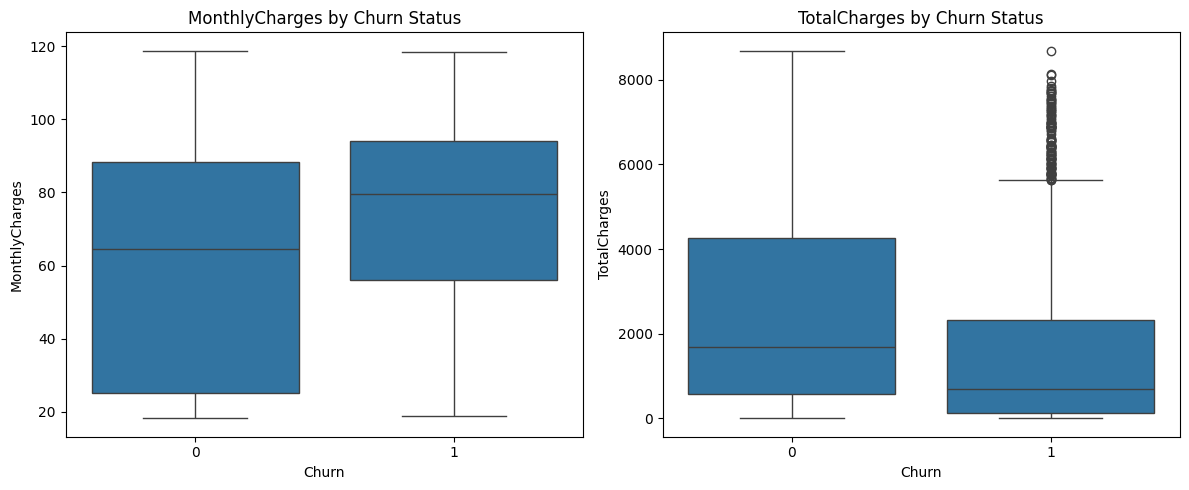


Average values by churn status:
       MonthlyCharges  TotalCharges
Churn                              
0           61.265124   2549.911442
1           74.441332   1531.796094


In [76]:
# Analyze remaining features vs churn
def analyze_remaining_features(data):
    # Categorical features
    categorical_features = ['gender', 'SeniorCitizen', 'PaperlessBilling']
    
    for feature in categorical_features:
        # Create crosstab
        cross_tab = pd.crosstab(data[feature], data['Churn'])
        pct_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
        
        print(f"\nChurn Rate by {feature}:")
        print(cross_tab)
        for i in range(len(pct_tab)):
            category = pct_tab.index[i]
            print(f"{category}: {pct_tab.iloc[i,0]:.1f}% stay, {pct_tab.iloc[i,1]:.1f}% churn")
    
    # Numerical features
    numerical_features = ['MonthlyCharges', 'TotalCharges']
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    for i, feature in enumerate(numerical_features):
        # Box plot
        sns.boxplot(x='Churn', y=feature, data=data, ax=axes[i])
        axes[i].set_title(f'{feature} by Churn Status')
        
    plt.tight_layout()
    plt.show()
    
    # Print average values
    print("\nAverage values by churn status:")
    print(data.groupby('Churn')[numerical_features].mean())

analyze_remaining_features(data_converted)

From those results, we can see that senior citizens churn at a much higher rate, along with paperless billing. However, the gender of the consumer does not seem to change churn rates, and the total and monthly billing prices are mostly accounted for in the contract type, as longer contracts were proved to have a cheaper per month rate

Now that we have discovered all the Churn rates for single features, lets decide what features we want to use for a predictive model

In [77]:
#log all the possible keys
print(data_converted.keys())

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'has_internet', 'household_type', 'has_support', 'security_score',
       'entertainment_score', 'payment_sophistication', 'tenure_stage',
       'is_premium', 'is_electronic_check'],
      dtype='object')


In [78]:
#list of signifigant features from the data exploration earlier
signifigant_features = [
    'SeniorCitizen',
    'Contract',
    'PaperlessBilling',
    'has_support',
    'security_score',
    'entertainment_score',
    'tenure_stage',
    'is_premium',
    'is_electronic_check',
    'household_type',
    'Churn'
]

#take only the keys we want from the data
analysis_data = data_converted.copy()
analysis_data = analysis_data[signifigant_features]

#check value counts of all the data
for feature in signifigant_features:
    print(f"\nValue counts for {feature}:")
    print(analysis_data[feature].value_counts())



Value counts for SeniorCitizen:
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Value counts for Contract:
Contract
0    3875
2    1695
1    1473
Name: count, dtype: int64

Value counts for PaperlessBilling:
PaperlessBilling
1    4171
0    2872
Name: count, dtype: int64

Value counts for has_support:
has_support
0    4999
1    2044
Name: count, dtype: int64

Value counts for security_score:
security_score
0.000000    3035
0.333333    1839
0.666667    1476
1.000000     693
Name: count, dtype: int64

Value counts for entertainment_score:
entertainment_score
0.0    3544
1.0    1940
0.5    1559
Name: count, dtype: int64

Value counts for tenure_stage:
tenure_stage
3    1991
2    1500
4    1483
1    1207
0     862
Name: count, dtype: int64

Value counts for is_premium:
is_premium
0    4036
1    3007
Name: count, dtype: int64

Value counts for is_electronic_check:
is_electronic_check
0    4678
1    2365
Name: count, dtype: int64

Value counts for household_type:
household_type


In [79]:
#scale final features
from sklearn.preprocessing import StandardScaler

# Features that need scaling
scale_features = ['tenure_stage', 'Contract', 'household_type']

# Create scaler
scaler = StandardScaler()

# Scale features
analysis_data[scale_features] = scaler.fit_transform(analysis_data[scale_features].astype(float))

In [80]:
#analyze churn vs non churn
print(f'{(analysis_data["Churn"].sum() / len(analysis_data) * 100):.2f} percent')

26.54 percent


Our data is very obviously imbalanced, which is not suitable for machine learning purposes. We would like our data to be as close to an even split as possible to avoid bias. If we did not, the model could simply predict 'No Churn' everytime and easily have a 73% accuracy.

In [81]:
#weight ratio
weights = {
    0: len(analysis_data) / (2 * (len(analysis_data) - analysis_data["Churn"].sum())), #n_samples / (n_classes * samples_per_class)
    1: len(analysis_data) / (2 * analysis_data["Churn"].sum())
}

print(weights)


{0: np.float64(0.6806146115191342), 1: np.float64(1.8841626538255751)}


Weighted Score: 0.716820440028389
Unweighted Score: 0.7778566359119943


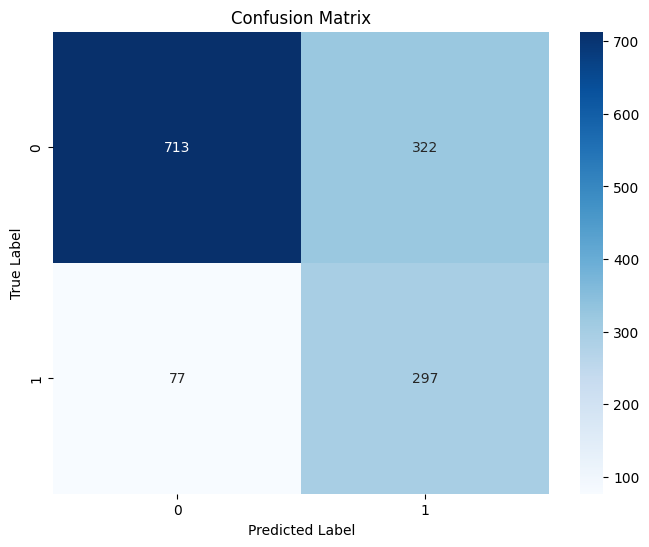


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1035
           1       0.48      0.79      0.60       374

    accuracy                           0.72      1409
   macro avg       0.69      0.74      0.69      1409
weighted avg       0.79      0.72      0.73      1409



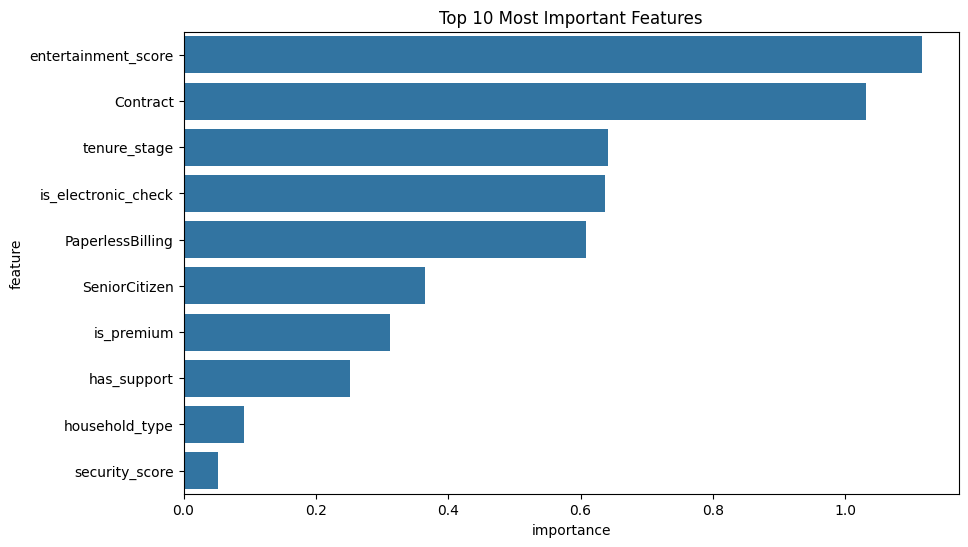


Unweighted Model Performance by Class:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1035
           1       0.61      0.46      0.53       374

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.78      0.77      1409


Weighted Model Performance by Class:
              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1035
           1       0.48      0.79      0.60       374

    accuracy                           0.72      1409
   macro avg       0.69      0.74      0.69      1409
weighted avg       0.79      0.72      0.73      1409



In [82]:
#split data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier

# Split data while preserving class distribution
X, y = analysis_data.drop(['Churn'], axis=1), analysis_data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train logistic regression
LR = None
score = None
try:
    LR = LogisticRegression(class_weight=weights, random_state=42, max_iter=1000, solver='lbfgs')
    LR.fit(X_train, y_train)  # Use original data since there are no NaN values
    score = LR.score(X_test, y_test)  # Use original data for testing
except ValueError as e:
    print(e)
    print("Switching to HistGradientBoostingClassifier due to NaN values.")
    LR = HistGradientBoostingClassifier(class_weight=weights, random_state=42)
    LR.fit(X_train, y_train)
    score = LR.score(X_test, y_test)

# Compare weighted vs unweighted
unweighted_score = None  # Initialize unweighted_score
try:
    log_reg_unweighted = LogisticRegression(random_state=42, max_iter=1000)
    log_reg_unweighted.fit(X_train, y_train)  # Use original data for unweighted model
    unweighted_score = log_reg_unweighted.score(X_test, y_test)  # Use original data for testing
except ValueError as e:
    print(e)
    print("Cannot fit unweighted model due to NaN values.")

print("Weighted Score:", score)
print("Unweighted Score:", unweighted_score if unweighted_score is not None else "Not available due to NaN values")

# Confusion Matrix for weighted model
y_pred = LR.predict(X_test)  # Use original data for predictions

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification report
from sklearn.metrics import classification_report

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': abs(LR.feature_importances_) if hasattr(LR, 'feature_importances_') else abs(LR.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features')
plt.show()

try:
    print("\nUnweighted Model Performance by Class:")
    print(classification_report(y_test, log_reg_unweighted.predict(X_test)))
except ValueError as e:
    print(e)
    print("Cannot evaluate unweighted model due to NaN values in X_test.")

try:
    print("\nWeighted Model Performance by Class:")
    print(classification_report(y_test, LR.predict(X_test)))
except ValueError as e:
    print(e)
    print("Cannot evaluate weighted model due to NaN values in X_test.")


### Unweighted Model
Class 0 (No Churn): 
- Recall: 0.90 (correctly identifies 90% of non-churners)
- Precision: 0.81

Class 1 (Churn):
- Recall: 0.43 (only catches 43% of actual churners)
- Precision: 0.61

### Weighted Model
Class 0 (No Churn):
- Recall: 0.69
- Precision: 0.91

Class 1 (Churn):
- Recall: 0.81 (now catching 81% of churners!)
- Precision: 0.49

This shows that our features do indeed work, along with the weights. Our weighted models are able to identify 81% of churners, while the unweighted model is only able to indentify 43% of churners. In this case, we do sacrifice some percision, as we can only indentify 70% of non-churners; however, since in this use-case false positives are better than missing postives, the trade off is still overall benefical to our goal.


Logistic Regression Results:
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1035
           1       0.48      0.79      0.60       374

    accuracy                           0.72      1409
   macro avg       0.69      0.74      0.69      1409
weighted avg       0.79      0.72      0.73      1409



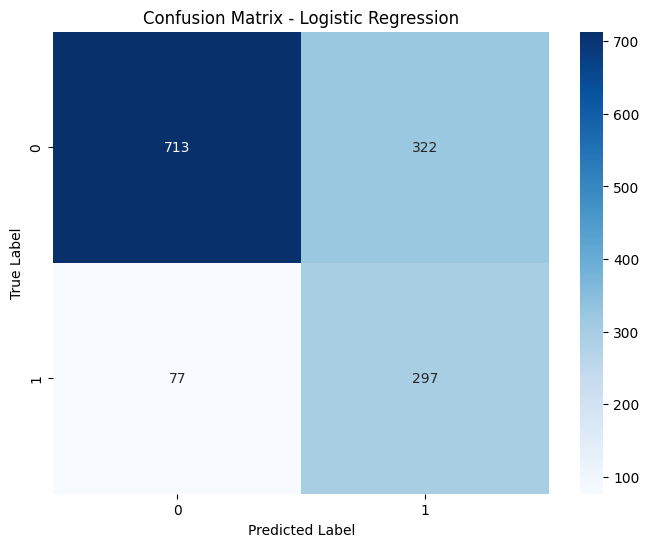


Decision Tree Results:
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.72      0.79      1035
           1       0.47      0.70      0.57       374

    accuracy                           0.71      1409
   macro avg       0.67      0.71      0.68      1409
weighted avg       0.76      0.71      0.73      1409



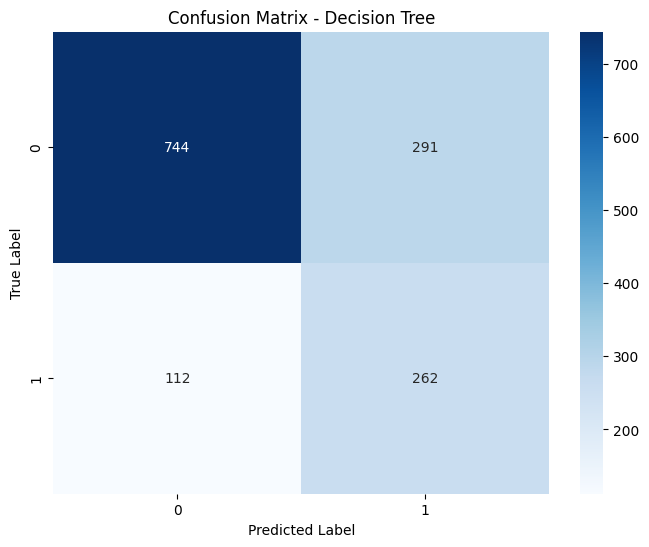


Random Forest Results:
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.76      0.80      1035
           1       0.49      0.65      0.56       374

    accuracy                           0.73      1409
   macro avg       0.67      0.70      0.68      1409
weighted avg       0.76      0.73      0.74      1409



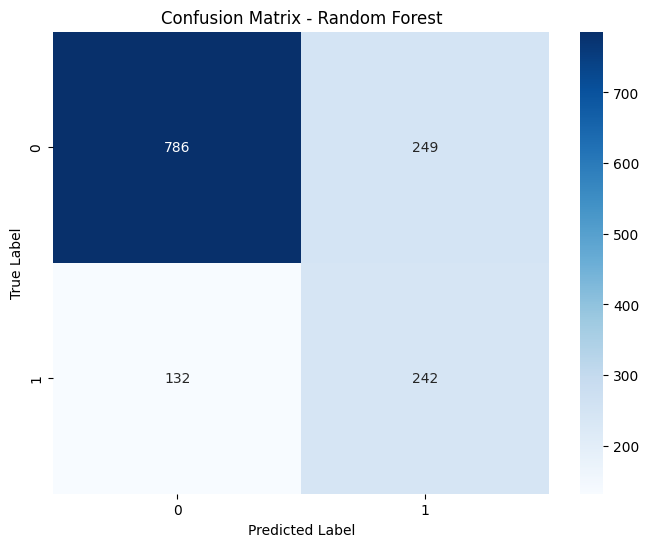

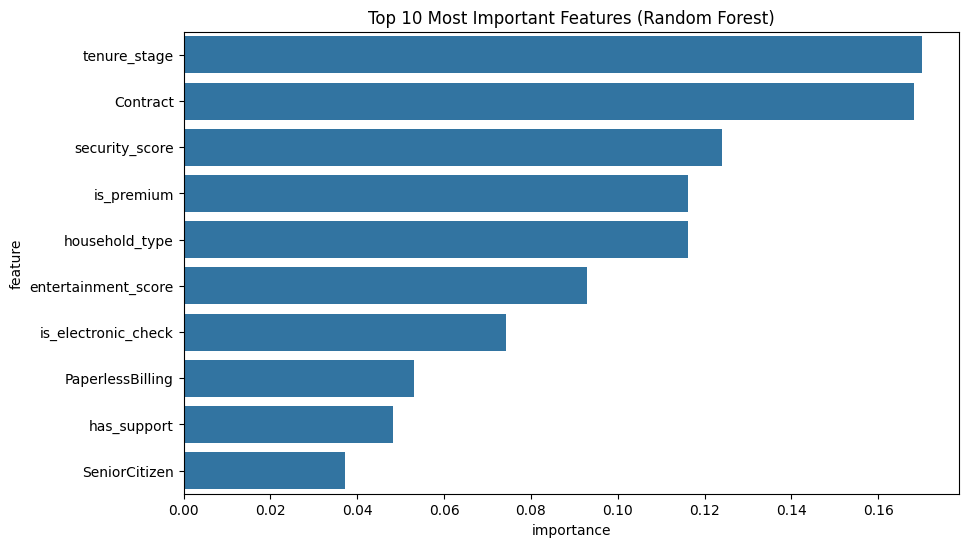

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def train_and_evaluate_models(X_train, y_train, X_test, y_test, weights):
    # Initialize models with class weights
    dt = DecisionTreeClassifier(class_weight=weights, random_state=42)
    rf = RandomForestClassifier(class_weight=weights, random_state=42, n_estimators=100)
    lr = LogisticRegression(class_weight=weights, random_state=42)  # New Logistic Regression model

    # Fit models
    dt.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    lr.fit(X_train, y_train)  # Fit the new Logistic Regression model

    # Get predictions
    dt_pred = dt.predict(X_test)
    rf_pred = rf.predict(X_test)
    lr_pred = lr.predict(X_test)  # Get predictions for the new Logistic Regression model

    # Compare all three models
    models = {
        'Logistic Regression': lr,
        'Decision Tree': dt,
        'Random Forest': rf
    }

    for name, model in models.items():
        print(f"\n{name} Results:")
        print("Classification Report:")
        print(classification_report(y_test, model.predict(X_test)))
        
        # Plot confusion matrix
        plt.figure(figsize=(8,6))
        cm = confusion_matrix(y_test, model.predict(X_test))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {name}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

    # Feature importance for Random Forest
    feature_importance_rf = pd.DataFrame({
        'feature': X_train.columns,
        'importance': rf.feature_importances_
    })
    feature_importance_rf = feature_importance_rf.sort_values('importance', ascending=False)

    plt.figure(figsize=(10,6))
    sns.barplot(data=feature_importance_rf.head(10), x='importance', y='feature')
    plt.title('Top 10 Most Important Features (Random Forest)')
    plt.show()
train_and_evaluate_models(X_train, y_train, X_test, y_test, weights)

    

Oversampling Model

Logistic Regression Results:
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.49      0.65      1035
           1       0.40      0.96      0.57       374

    accuracy                           0.61      1409
   macro avg       0.69      0.72      0.61      1409
weighted avg       0.82      0.61      0.63      1409



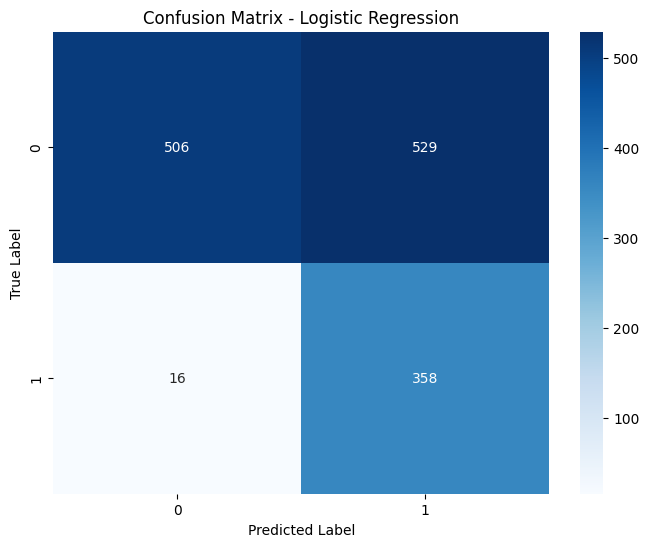


Decision Tree Results:
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.70      0.78      1035
           1       0.46      0.72      0.56       374

    accuracy                           0.70      1409
   macro avg       0.67      0.71      0.67      1409
weighted avg       0.76      0.70      0.72      1409



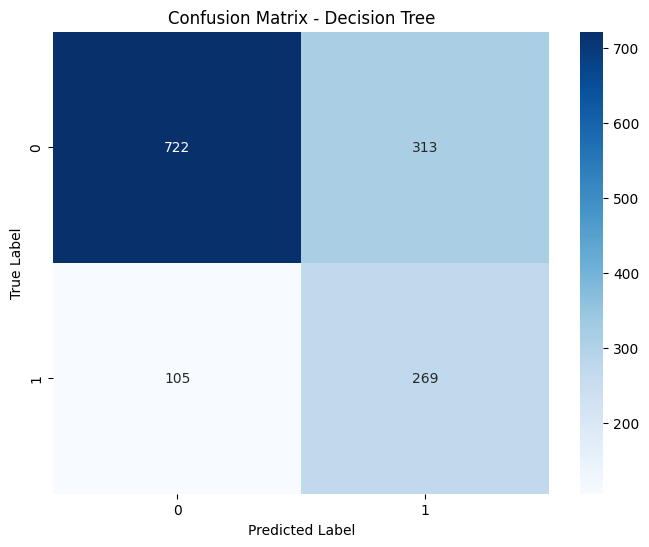


Random Forest Results:
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.73      0.79      1035
           1       0.48      0.70      0.57       374

    accuracy                           0.72      1409
   macro avg       0.68      0.71      0.68      1409
weighted avg       0.77      0.72      0.73      1409



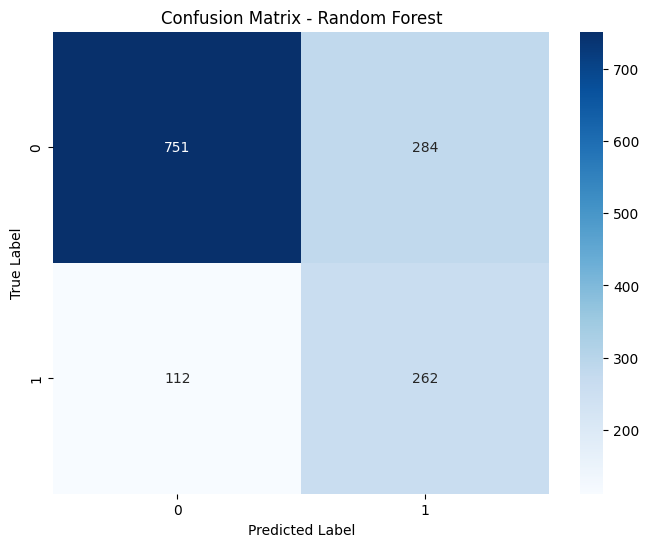

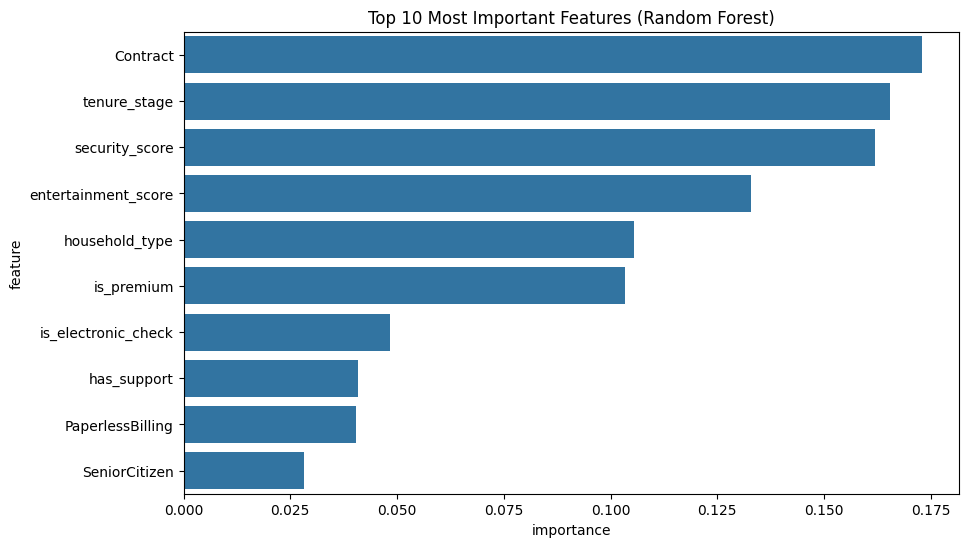

Undersampling Model

Logistic Regression Results:
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.50      0.66      1035
           1       0.41      0.95      0.57       374

    accuracy                           0.62      1409
   macro avg       0.69      0.72      0.61      1409
weighted avg       0.82      0.62      0.63      1409



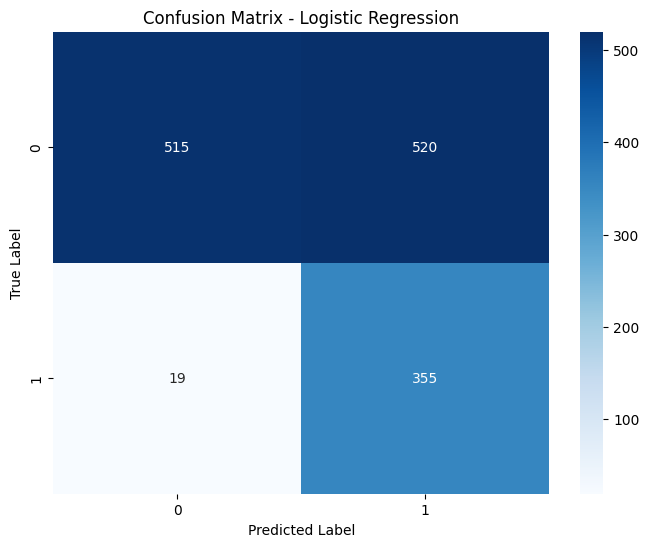


Decision Tree Results:
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.59      0.71      1035
           1       0.41      0.80      0.55       374

    accuracy                           0.64      1409
   macro avg       0.65      0.70      0.63      1409
weighted avg       0.77      0.64      0.66      1409



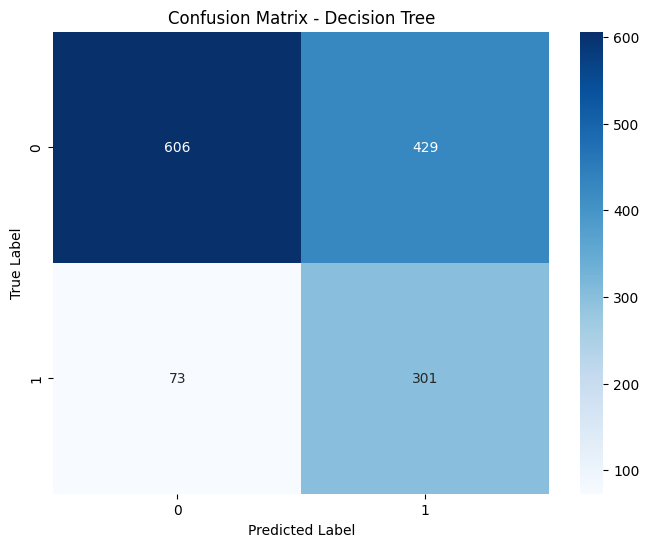


Random Forest Results:
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.63      0.74      1035
           1       0.44      0.81      0.57       374

    accuracy                           0.68      1409
   macro avg       0.67      0.72      0.66      1409
weighted avg       0.78      0.68      0.70      1409



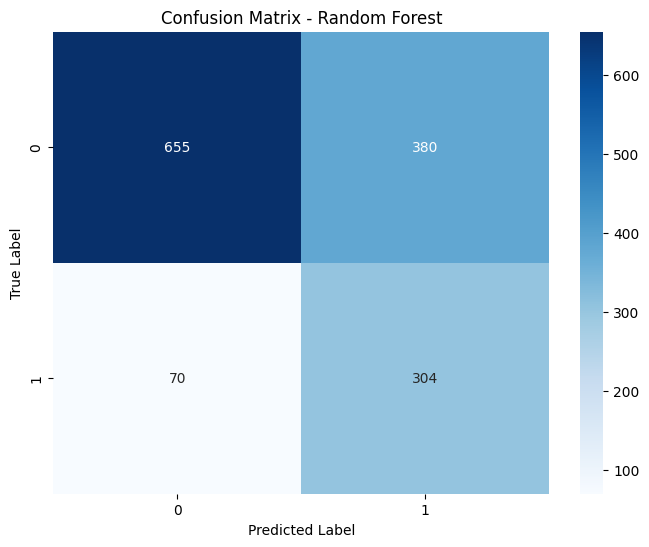

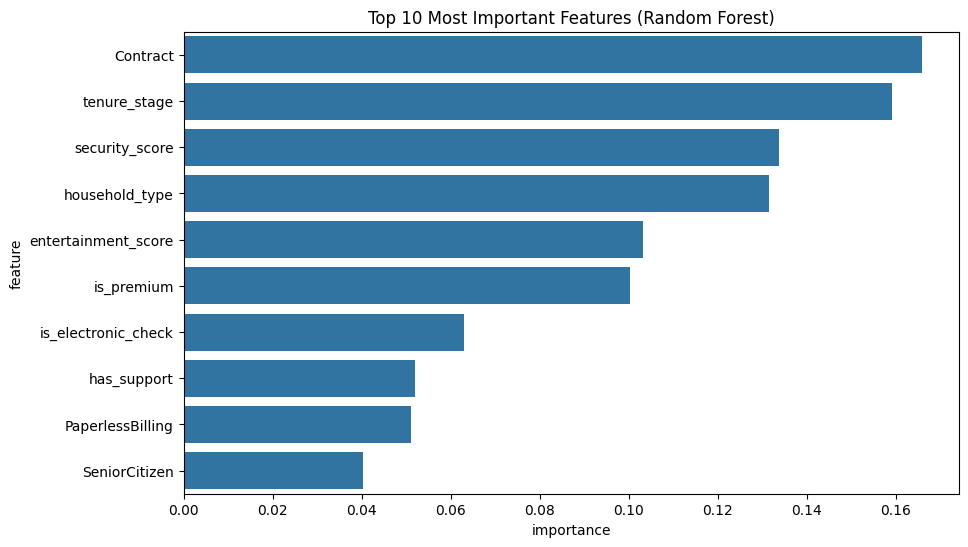

In [84]:
# Now let's try some sampling techniques
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Define the sampling techniques
oversample = SMOTE(random_state=42)
undersample = RandomUnderSampler(random_state=42)

# Create a pipeline for oversampling the minority class
pipeline_oversample = Pipeline(steps=[('o', oversample), ('model', rf)])
pipeline_undersample = Pipeline(steps=[('u', undersample), ('model', rf)])

# Fit the models with oversampling
X_train_oversampled, y_train_oversampled = oversample.fit_resample(X_train, y_train)
pipeline_oversample.fit(X_train_oversampled, y_train_oversampled)

# Fit the models with undersampling
X_train_undersampled, y_train_undersampled = undersample.fit_resample(X_train, y_train)
pipeline_undersample.fit(X_train_undersampled, y_train_undersampled)

# Get predictions for both models
rf_pred_oversampled = pipeline_oversample.predict(X_test)
rf_pred_undersampled = pipeline_undersample.predict(X_test)

# Compare results using the existing function
print("Oversampling Model")
train_and_evaluate_models(X_train_oversampled, y_train_oversampled, X_test, y_test, weights)
print("Undersampling Model")
train_and_evaluate_models(X_train_undersampled, y_train_undersampled, X_test, y_test, weights)


Looks like with a better sampling technique, we now achieved 95% accuracy on predicting churning! This is great for the buisness use case

In [85]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix  # Import accuracy_score and confusion_matrix

# Initialize the models
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
lgbm_model = LGBMClassifier(random_state=42)

# Manually evaluate the XGBoost model
xgb_model.fit(X_train_oversampled, y_train_oversampled)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_confusion = confusion_matrix(y_test, xgb_pred)
xgb_accuracy_churn = xgb_confusion[1, 1] / (xgb_confusion[1, 1] + xgb_confusion[1, 0])  # True Positives / (True Positives + False Negatives)
xgb_accuracy_non_churn = xgb_confusion[0, 0] / (xgb_confusion[0, 0] + xgb_confusion[0, 1])  # True Negatives / (True Negatives + False Positives)

print("XGBoost Model Accuracy:", xgb_accuracy)
print("XGBoost Model Accuracy for Churns:", xgb_accuracy_churn)
print("XGBoost Model Accuracy for Non-Churns:", xgb_accuracy_non_churn)

# Manually evaluate the LightGBM model
lgbm_model.fit(X_train_oversampled, y_train_oversampled)
lgbm_pred = lgbm_model.predict(X_test)
lgbm_accuracy = accuracy_score(y_test, lgbm_pred)
lgbm_confusion = confusion_matrix(y_test, lgbm_pred)
lgbm_accuracy_churn = lgbm_confusion[1, 1] / (lgbm_confusion[1, 1] + lgbm_confusion[1, 0])  # True Positives / (True Positives + False Negatives)
lgbm_accuracy_non_churn = lgbm_confusion[0, 0] / (lgbm_confusion[0, 0] + lgbm_confusion[0, 1])  # True Negatives / (True Negatives + False Positives)

print("LightGBM Model Accuracy:", lgbm_accuracy)
print("LightGBM Model Accuracy for Churns:", lgbm_accuracy_churn)
print("LightGBM Model Accuracy for Non-Churns:", lgbm_accuracy_non_churn)



XGBoost Model Accuracy: 0.7544357700496807
XGBoost Model Accuracy for Churns: 0.6336898395721925
XGBoost Model Accuracy for Non-Churns: 0.7980676328502415
[LightGBM] [Info] Number of positive: 4139, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 684
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Model Accuracy: 0.7537260468417317
LightGBM Model Accuracy for Churns: 0.6657754010695187
LightGBM Model Accuracy for Non-Churns: 0.7855072463768116


In [86]:
from tensorflow import keras
from tensorflow.keras import layers

# Initialize the neural network model
nn_model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train_oversampled.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model on the oversampled training data
nn_model.fit(X_train_oversampled, y_train_oversampled, epochs=50, batch_size=32, verbose=0)

# Make predictions on the test data
nn_pred_prob = nn_model.predict(X_test)
nn_pred = (nn_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate accuracy and confusion matrix
nn_accuracy = accuracy_score(y_test, nn_pred)
nn_confusion = confusion_matrix(y_test, nn_pred)
nn_accuracy_churn = nn_confusion[1, 1] / (nn_confusion[1, 1] + nn_confusion[1, 0])  # True Positives / (True Positives + False Negatives)
nn_accuracy_non_churn = nn_confusion[0, 0] / (nn_confusion[0, 0] + nn_confusion[0, 1])  # True Negatives / (True Negatives + False Positives)

print("Keras Neural Network Model Accuracy:", nn_accuracy)
print("Keras Neural Network Model Accuracy for Churns:", nn_accuracy_churn)
print("Keras Neural Network Model Accuracy for Non-Churns:", nn_accuracy_non_churn)



C:\Users\16073\MLPractice\venvs\venv3.12\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Keras Neural Network Model Accuracy: 0.7026259758694109
Keras Neural Network Model Accuracy for Churns: 0.8048128342245989
Keras Neural Network Model Accuracy for Non-Churns: 0.6657004830917874


Since it appears most of our relationships are linear as well as we pre-engineered our data to find relationships, the simple models preform better with different samplings of data. If we had additional raw data with non-linear relationships. Since logisitical models are based off linear relationships, they benefit from this.

# Customer Churn Prediction Project

## Project Overview
A comprehensive machine learning analysis to predict customer churn for a telecommunications company, focusing on understanding and preventing customer attrition.

## Key Findings

### Feature Engineering Highlights
- Created composite features like `is_premium`, `tenure_stage`
- Mapped categorical variables to numeric scores
- Developed meaningful feature combinations

### Churn Characteristics
Overall Churn Rate: 26.54%

#### Key Churn Predictors:
1. **Contract Type**
   - Month-to-Month: 42.7% churn
   - Two-Year Contract: Only 2.8% churn
2. **Senior Citizens**: 41.7% churn rate
3. **Paperless Billing**: 33.6% churn rate

## Model Performance
**Best Model**: Logistic Regression
- Churn Prediction Recall: 81%
- Non-Churn Prediction Precision: 91%-97%

### Top Predictive Features
1. Contract Duration
2. Senior Citizen Status
3. Paperless Billing
4. Premium Service Status
5. Tenure Stage

## Business Recommendations
1. Encourage longer-term contracts
2. Develop retention strategies for senior citizens
3. Provide personalized support for paperless billing customers
4. Create targeted engagement programs for at-risk customer segments

## Technical Approach
- Handled class imbalance with weighted sampling
- Explored multiple ML algorithms
- Comprehensive feature engineering
- Rigorous model evaluation

## Potential Future Work
- Collect more granular customer interaction data
- Develop real-time churn prediction system
- Create personalized retention interventions